# Parte 2: Reconocimiento de dígitos escritos a mano (MNIST) con CNN

**Objetivo:** Entrenar una red neuronal convolucional (CNN) para clasificar imágenes de dígitos (0 al 9) del dataset MNIST.

Se evaluará el modelo mediante:
- Gráficos de pérdida y precisión por época
- Un conjunto de **10 predicciones** con ejemplos del dataset


In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)


In [2]:
# Carga de datos MNIST

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print("x_train:", x_train.shape, "y_train:", y_train.shape)
print("x_test:", x_test.shape, "y_test:", y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
x_train: (60000, 28, 28) y_train: (60000,)
x_test: (10000, 28, 28) y_test: (10000,)


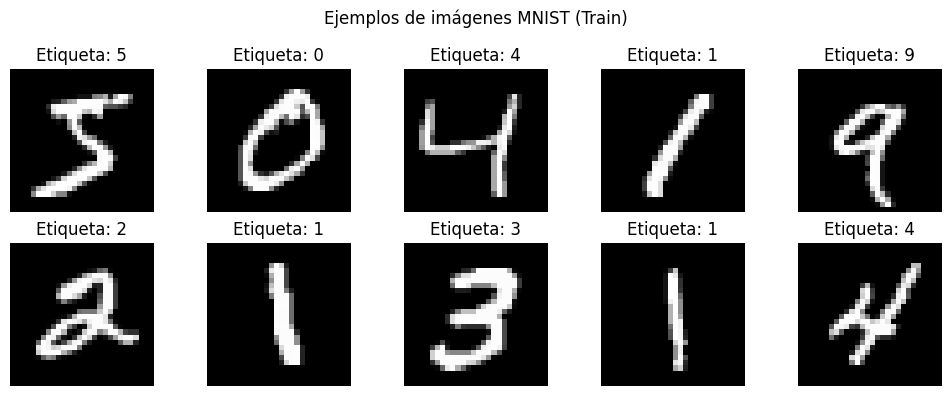

In [3]:
# =========================
# Visualización de ejemplos
# =========================

plt.figure(figsize=(10, 4))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(f"Etiqueta: {y_train[i]}")
    plt.axis("off")

plt.suptitle("Ejemplos de imágenes MNIST (Train)")
plt.tight_layout()
plt.show()


## Preprocesamiento

In [5]:
# Normalizar (0-255) -> (0-1)
x_train_norm = x_train.astype("float32") / 255.0
x_test_norm = x_test.astype("float32") / 255.0

# Agregar canal (MNIST es escala de grises, entonces 1 canal)
x_train_cnn = np.expand_dims(x_train_norm, axis=-1)  
x_test_cnn = np.expand_dims(x_test_norm, axis=-1)    

print("x_train_cnn:", x_train_cnn.shape)
print("x_test_cnn:", x_test_cnn.shape)


x_train_cnn: (60000, 28, 28, 1)
x_test_cnn: (10000, 28, 28, 1)


## Construcción del Modelo

In [7]:
modelo_cnn = keras.Sequential(name="cnn_mnist")

# Entrada explícita
modelo_cnn.add(layers.Input(shape=(28, 28, 1), name="entrada_imagen"))

# Bloque convolucional 1 (para extraer patrones visuales)
modelo_cnn.add(layers.Conv2D(32, (3, 3), activation="relu", name="conv1"))
modelo_cnn.add(layers.MaxPooling2D((2, 2), name="pool1"))

# Bloque convolucional 2 (extrae patrones más complejos)
modelo_cnn.add(layers.Conv2D(64, (3, 3), activation="relu", name="conv2"))
modelo_cnn.add(layers.MaxPooling2D((2, 2), name="pool2"))

# Clasificador
modelo_cnn.add(layers.Flatten(name="flatten"))
modelo_cnn.add(layers.Dense(128, activation="relu", name="densa_oculta"))
modelo_cnn.add(layers.Dropout(0.3, name="dropout"))

# Salida (10 clases)
modelo_cnn.add(layers.Dense(10, activation="softmax", name="salida"))

modelo_cnn.summary()


Model: "cnn_mnist"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ densa_oculta (Dense)            │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Compilación

modelo_cnn.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


**¿Por qué elegimos esas capas?**

- **Conv2D:** detecta patrones locales en la imagen (bordes, curvas, trazos).
- **MaxPooling2D:** reduce el tamaño, mantiene las características más relevantes y acelera el entrenamiento.
- **Flatten:** convierte los mapas de características en un vector para alimentar capas densas.
- **Dense:** aprende combinaciones de características para diferenciar dígitos.
- **Dropout:** regulariza el modelo para reducir sobreajuste.
- **Softmax (salida):** entrega probabilidades para cada clase (0 al 9).


## Entrenamiento del modelo

In [10]:
historial_cnn = modelo_cnn.fit(
    x_train_cnn,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9142 - loss: 0.2908 - val_accuracy: 0.9778 - val_loss: 0.0741
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9740 - loss: 0.0844 - val_accuracy: 0.9845 - val_loss: 0.0507
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.9804 - loss: 0.0622 - val_accuracy: 0.9865 - val_loss: 0.0453
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9859 - loss: 0.0456 - val_accuracy: 0.9887 - val_loss: 0.0417
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9896 - val_loss: 0.0394
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9898 - loss: 0.0343 - val_accuracy: 0.9902 - val_loss: 0.0372
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9913 - loss: 0.0290 - val_accuracy: 0.9903 - val_loss: 0.0381
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.9922 - loss: 0.0240 - val_accu

Con base en los resultados del entrenamiento se puede afirmar que el modelo está aprendiendo bien. Selecciono la época 5 como la óptima, dado que tiene un accuracy muy alto (0.9896), y una diferencia entre pérdida de validación y pérdida de entranamiento menor que el resto de las épocas.

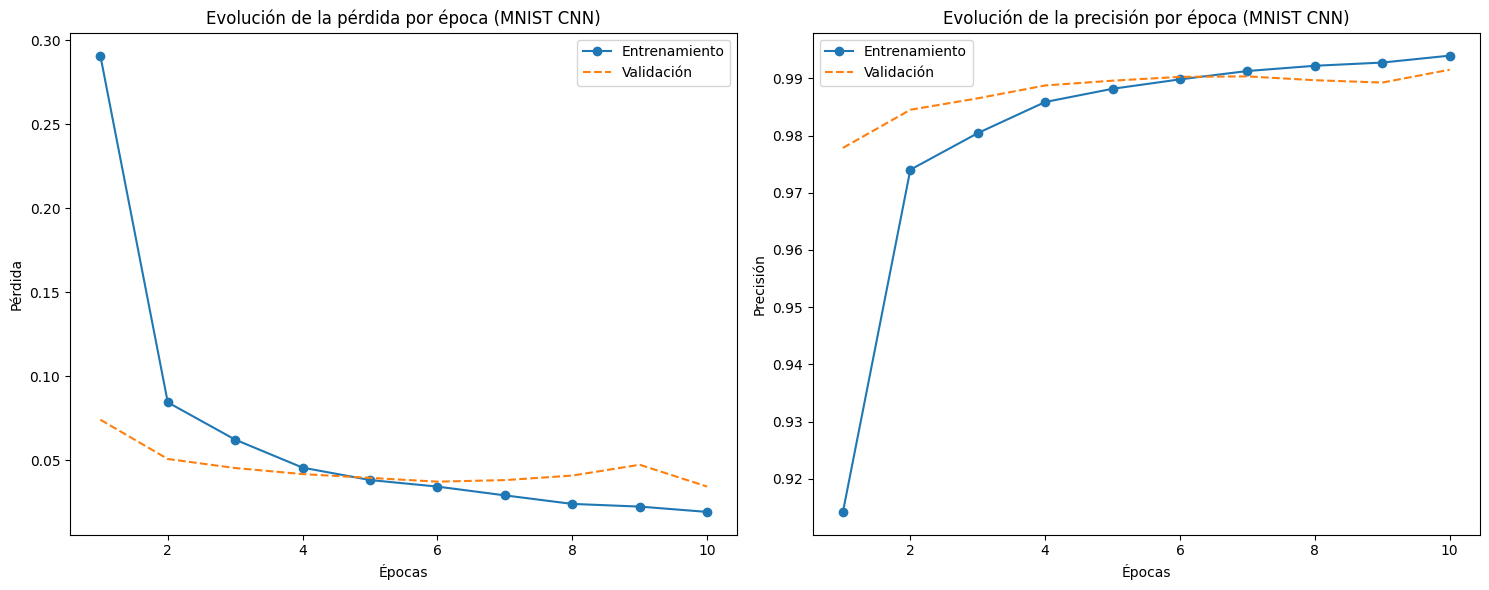

In [13]:
# =========================
# Gráficos: pérdida y precisión por época
# =========================
epocas = range(1, len(historial_cnn.history["loss"]) + 1)

plt.figure(figsize=(15, 6))

# Pérdida
plt.subplot(1, 2, 1)
plt.plot(epocas, historial_cnn.history["loss"], "o-", label="Entrenamiento")
plt.plot(epocas, historial_cnn.history["val_loss"], "--", label="Validación")
plt.title("Evolución de la pérdida por época (MNIST CNN)")
plt.xlabel("Épocas")
plt.ylabel("Pérdida")
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(epocas, historial_cnn.history["accuracy"], "o-", label="Entrenamiento")
plt.plot(epocas, historial_cnn.history["val_accuracy"], "--", label="Validación")
plt.title("Evolución de la precisión por época (MNIST CNN)")
plt.xlabel("Épocas")
plt.ylabel("Precisión")
plt.legend()

plt.tight_layout()
plt.show()


La gráfica onfirma lo que se pudo apreciar en el entrenamiento: 

- La **pérdida** disminuye a lo largo de las épocas y la **precisión** aumenta, lo que indica aprendizaje efectivo del modelo.

- La comparación entre entrenamiento y validación nos ha permitido observar que existe **sobreajuste** alrededor de la época 5.

## Evaluación del modelo

In [14]:

loss_test_cnn, acc_test_cnn = modelo_cnn.evaluate(x_test_cnn, y_test, verbose=0)
print(f"Pérdida en Test: {loss_test_cnn:.4f}")
print(f"Precisión en Test: {acc_test_cnn:.4f}")


Pérdida en Test: 0.0265
Precisión en Test: 0.9921


## Ejercicio con 10 predicciones

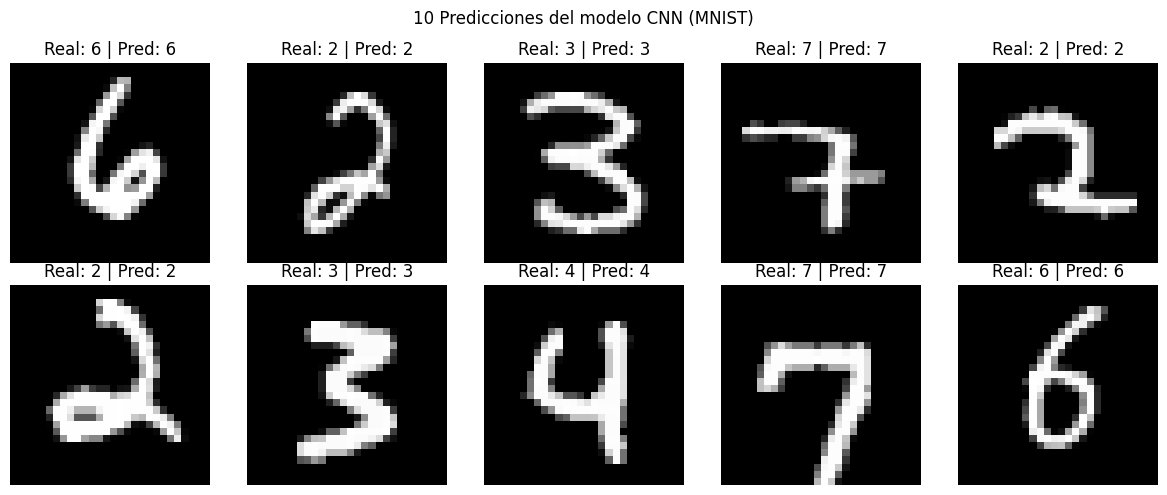

In [15]:
# 10 predicciones con datos del dataset (Test)

indices = np.random.choice(len(x_test_cnn), size=10, replace=False)

x_ejemplos = x_test_cnn[indices]
y_reales = y_test[indices]

# Predicciones
probas = modelo_cnn.predict(x_ejemplos, verbose=0)
y_predichas = np.argmax(probas, axis=1)

plt.figure(figsize=(12, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_ejemplos[i].squeeze(), cmap="gray")
    plt.title(f"Real: {y_reales[i]} | Pred: {y_predichas[i]}")
    plt.axis("off")

plt.suptitle("10 Predicciones del modelo CNN (MNIST)")
plt.tight_layout()
plt.show()


## Análisis de resultados (MNIST CNN)

- En el conjunto de prueba, el modelo logra una precisión elevada, lo que confirma su capacidad de generalización.
- Las 10 predicciones visuales muestran, en general, coincidencia entre etiqueta real y predicción, validando el desempeño del modelo.
